In [191]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import sklearn.metrics as metrics
from sklearn import datasets, linear_model, model_selection
%config InlineBackend.figure_format = 'retina'

%matplotlib inline

In [192]:
X = np.array([16, 17, 18, 19, 22, 25, 30, 36, 40, 47]).reshape(-1, 1)  # ages
y = np.array([10, 12, 17, 20, 21, 24, 22, 27, 33, 38])  # cigarettes_per_day

In [193]:
X, y = datasets.make_regression(n_samples=100, n_features=1, n_informative=1, noise=25, random_state=0)
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2, random_state=0)

In [197]:
X, y = datasets.make_regression(n_samples=100, n_features=1, n_informative=1, noise=25, random_state=0)

model = linear_model.LinearRegression()
model.fit(X,y)

y_pred = model.predict(X)
residuals = y - y_pred
SSR = np.sum(residuals**2)

r_squared = model.score(X, y)

In [198]:
print("Intercept :", model.intercept_)
print("Coefficient :", model.coef_[0])
print("R-squared :", r_squared)
print("Sum of Squared Residuals :", SSR)

Intercept : -2.0354545675768128
Coefficient : 42.97031844469039
R-squared : 0.7244091172944105
Sum of Squared Residuals : 71357.17885512178


The R-squared value calculated by the linear regression model is a measure of how well the independent variable(s) explain the variation in the dependent variable. 
</br>
In this context, the R-squared value is calculated based on the relationship between the actual values of the dependent variable (y) and the predicted values of the dependent variable (y_hat) produced by the model.

The formula for R-squared is:

$[ R^2 = 1 - \frac{{\text{SST}}}{{\text{SSR}}} ]$

In this formula:
- $( R^2 )$ represents the R-squared value.
- SST (Total Sum of Squares) is the sum of the squared differences between the actual values of the dependent variable and its mean.
- SSR (Sum of Squared Residuals) is the sum of the squared differences between the actual values of the dependent variable and the predicted values from the regression model.

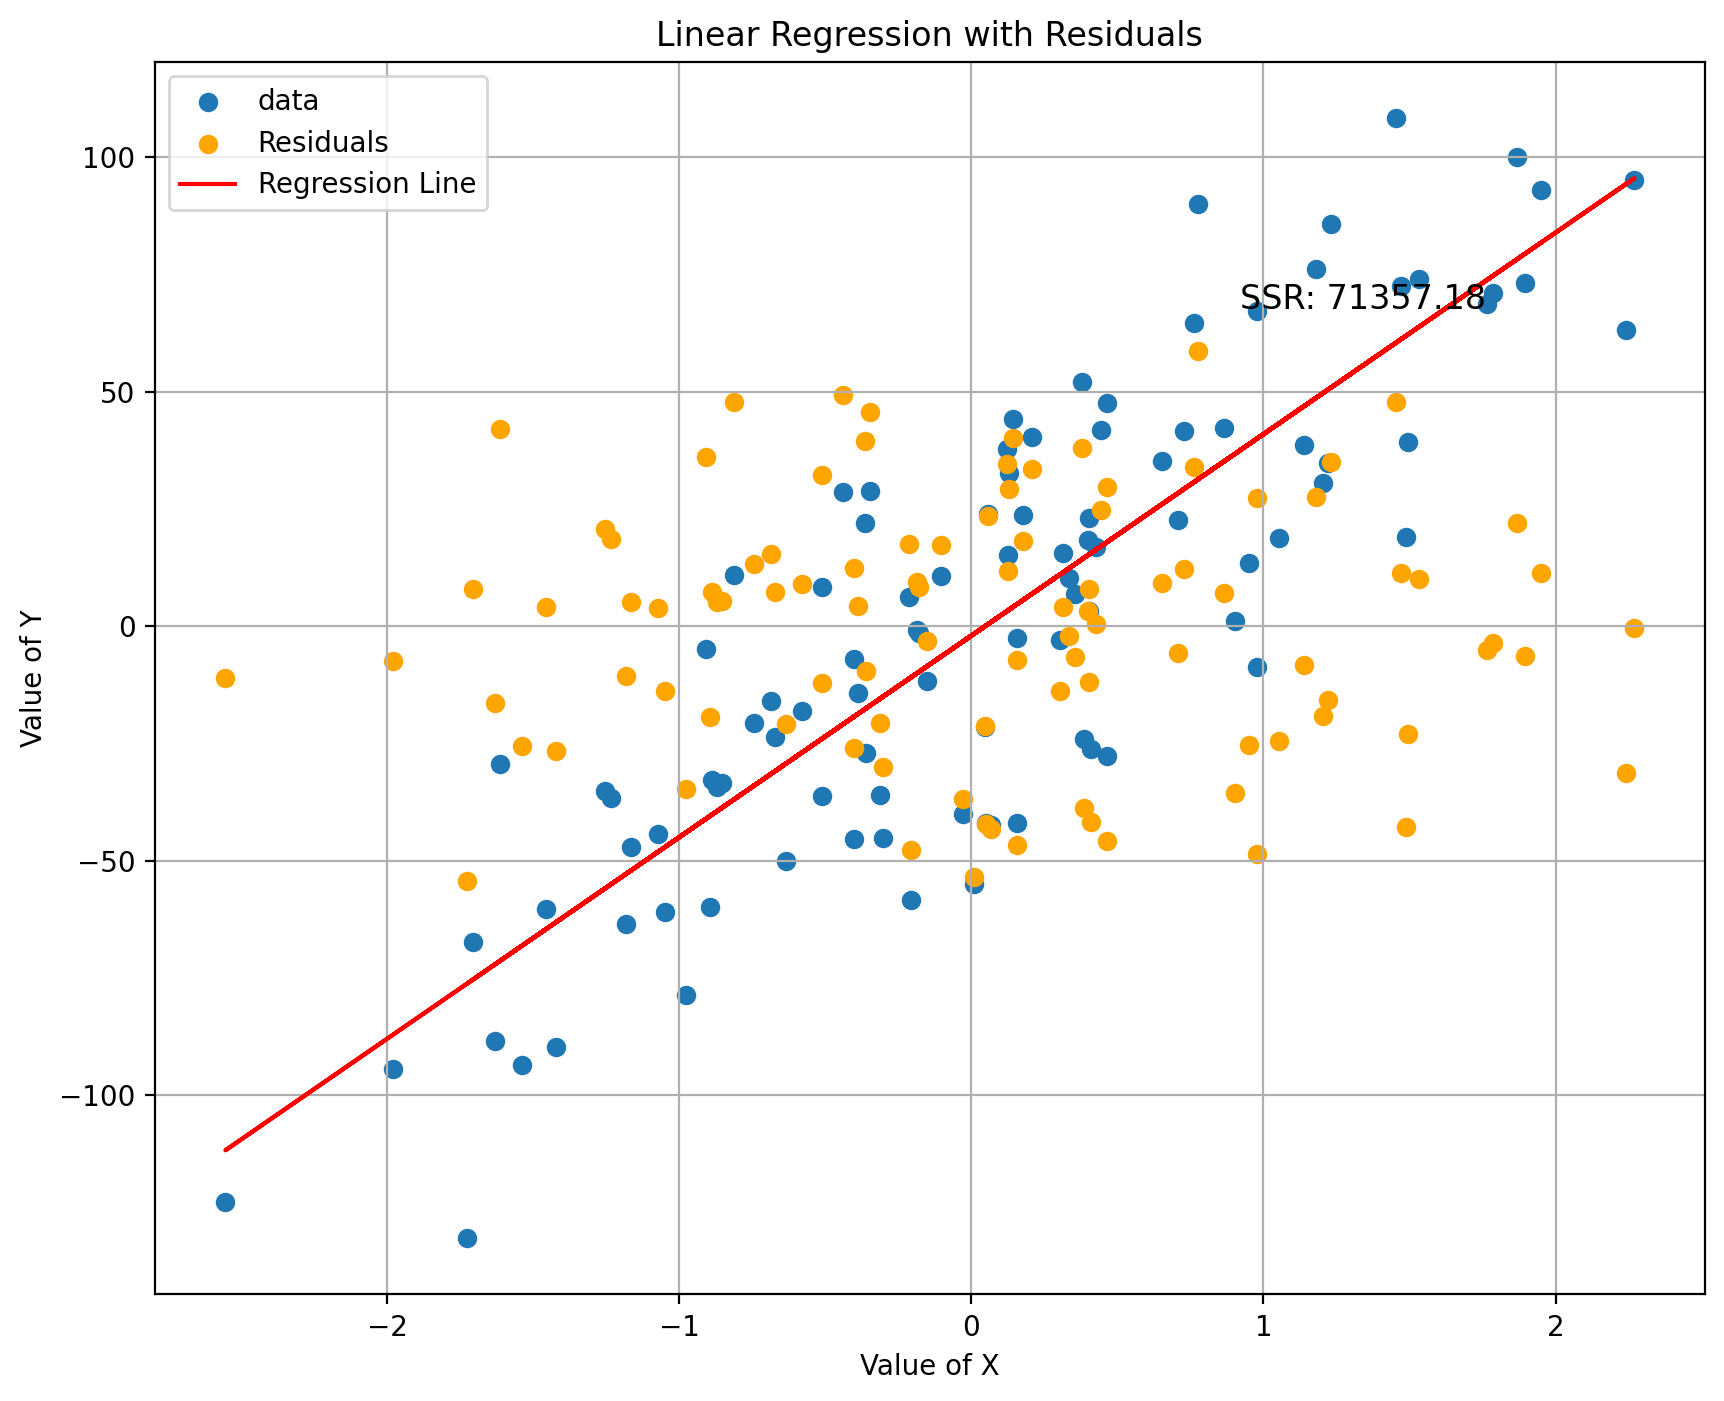

In [200]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(X, y, label="data")
ax.scatter(X, residuals, color="orange", label="Residuals")
plt.plot(X, y_pred, color="red", label="Regression Line")
ax.set_title("Linear Regression with Residuals")
ax.set_xlabel("Value of X")
ax.set_ylabel("Value of Y")
ax.grid()
ax.legend()
plt.show()

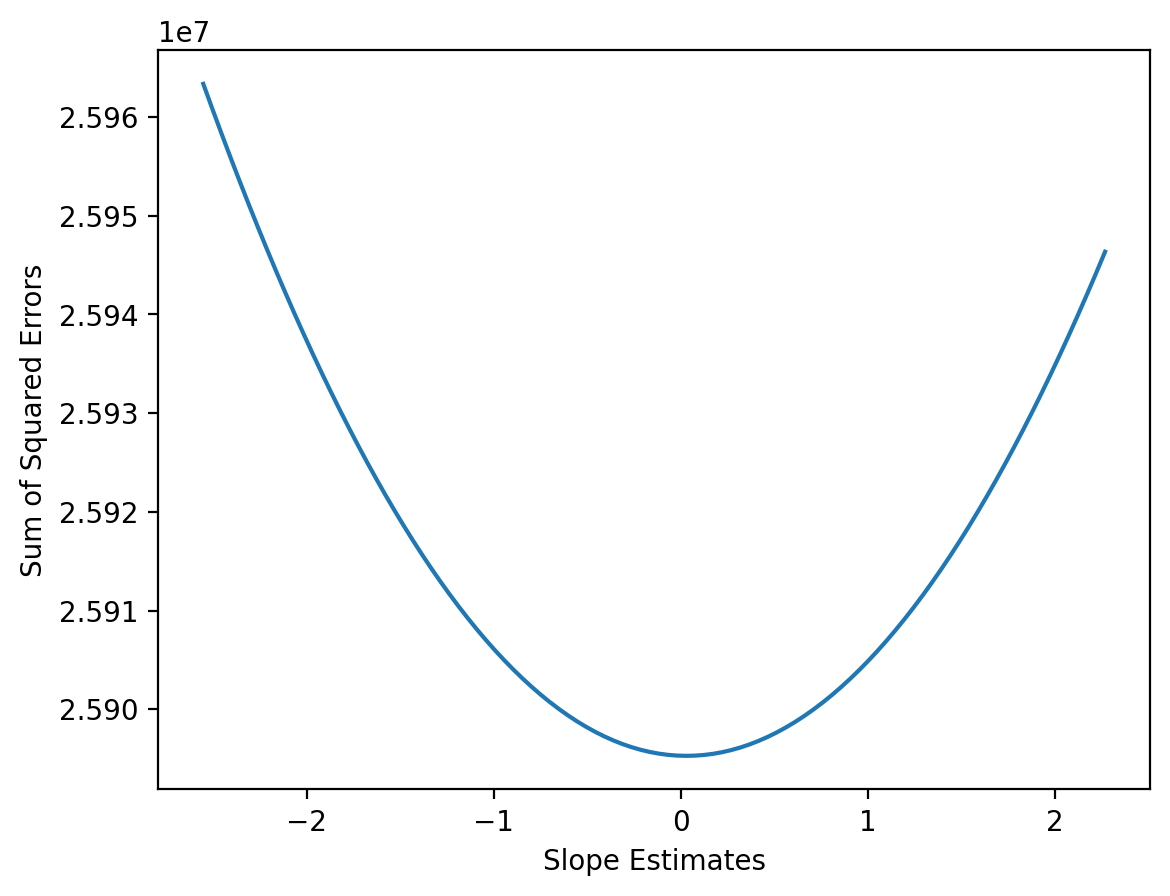

In [182]:
def sse(m, X, y, model):
    """
    Calculate the sum of squared errors (SSE) for a given slope parameter 'm'.

    Parameters:
    m (float): Slope parameter.
    X (array-like): Independent variable values.
    y (array-like): Dependent variable values.
    model: Trained linear regression model object.

    Returns:
    float: Sum of squared errors (SSE).
    """
    # Calculate predicted values using the linear regression model
    y_pred = m * X

    # Calculate residuals
    residuals = y - y_pred

    # Calculate sum of squared errors
    sse = np.sum(residuals**2)

    return sse


# Generate slope estimates
ms = np.linspace(x.min(), x.max(), x.size)

# Calculate SSE for each slope estimate
sses = [sse(m, x, y, model) for m in ms]

# Plot SSE against slope estimates
fig, ax = plt.subplots()
ax.plot(ms, sses)
ax.set_xlabel("Slope Estimates")
ax.set_ylabel("Sum of Squared Errors")
plt.show()

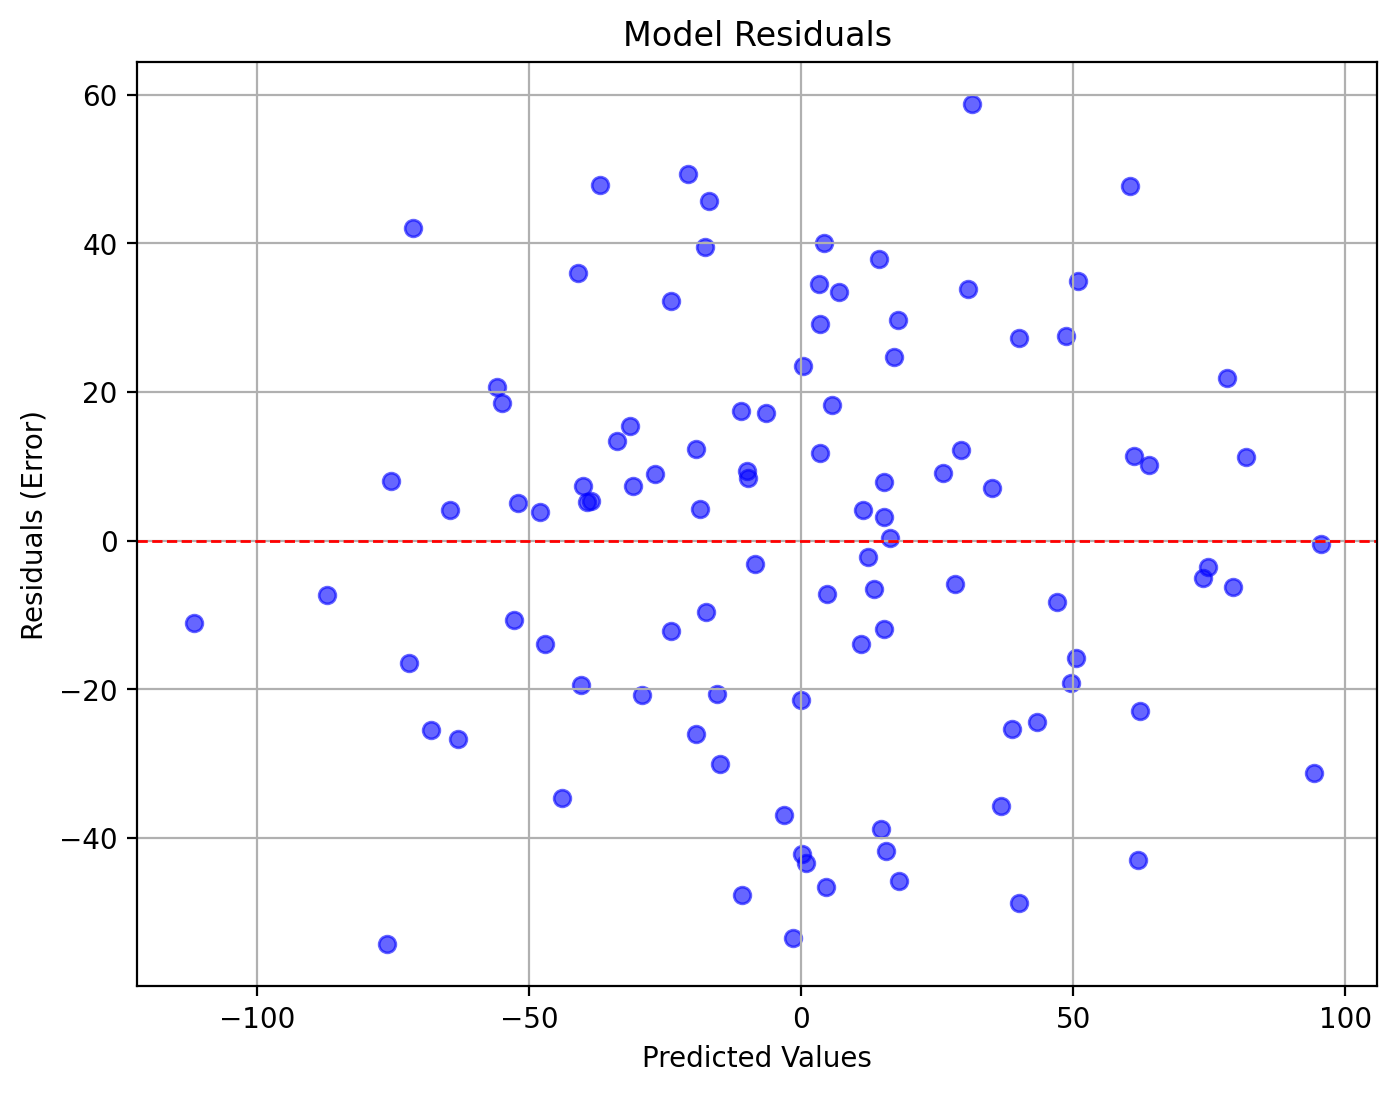

In [188]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model

# Generate data
x, y = datasets.make_regression(
    n_samples=100, n_features=1, n_informative=1, noise=25, random_state=0
)

# Fit linear regression model
model = linear_model.LinearRegression()
model.fit(x, y)

# Predict y values
y_hat = model.predict(x)

# Calculate residuals (model error)
residuals = y - y_hat

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_hat, residuals, color="blue", alpha=0.6)
plt.axhline(
    y=0, color="red", linestyle="--", linewidth=1
)  # Add a horizontal line at y=0 for reference
plt.title("Model Residuals")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Error)")
plt.grid(True)
plt.show()

In [169]:
metrics.mean_squared_error(y,y_hat)

2311.9725949059457

In [170]:
# Going 3d to plot error as a function of both m and b


def new_sse(m, x, b, y):
    """
    This function returns the sum of squared errors for
    a target y and a linear estimate mx + b.
    """
    return len(x) * metrics.mean_squared_error(y, m * x + b)

# Going back to our original example
X_sample = np.array([1, 3, 5])
Y_sample = np.array([2, 9, 10])

# This should be our minimum error
new_sse(2, X_sample, 1, Y_sample)

6.0

In [ ]:
metrics

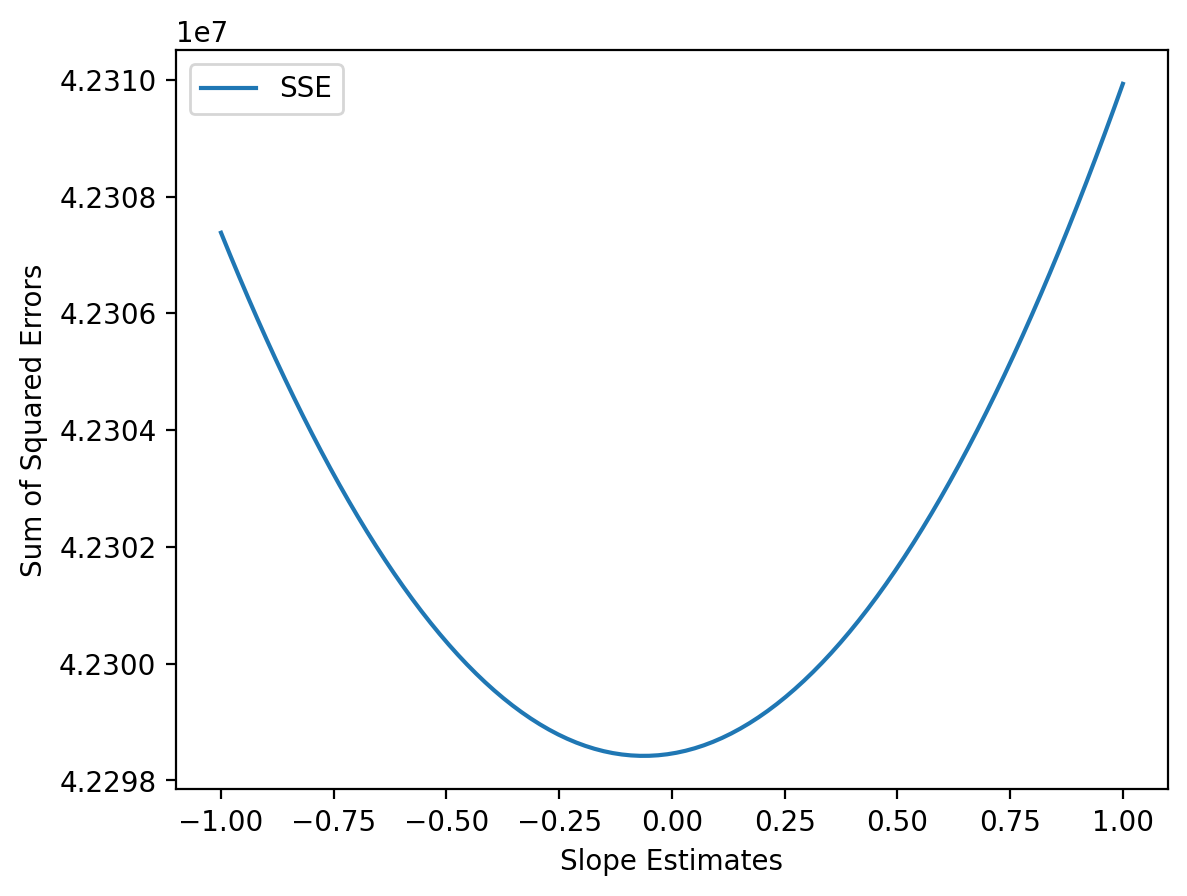

In [168]:
# Generate data
x, y = datasets.make_regression(n_samples=100, n_features=1, n_informative=1, noise=45, random_state=0)

# Fit linear regression model
model = linear_model.LinearRegression()
model.fit(x, y)

# Predict y values
y_hat = model.predict(x)

# Calculate residuals
residuals = y - y_hat

# Calculate R-squared
r_squared = model.score(x, y)


# Define function to calculate SSE for a given slope
def sse(m, x, y):
    """
    Calculate the sum of squared errors (SSE) for a given slope parameter 'm'.

    Parameters:
    m (float): Slope parameter.
    x (array-like): Independent variable values.
    y (array-like): Dependent variable values.

    Returns:
    float: Sum of squared errors (SSE).
    """
    # Calculate predicted values using the slope parameter 'm'
    y_pred = m * x

    # Calculate residuals
    residuals = y - y_pred

    # Calculate sum of squared errors
    sse = np.sum(residuals**2)

    return sse


# Generate a range of slope estimates
# ms = np.linspace(model.coef_[0] - 10, model.coef_[0] + 10, 100)
ms = np.linspace(-1,1, 100)

# Calculate SSE for each slope estimate
sses = [sse(m, x, y) for m in ms]

# Plot SSE against slope estimates
fig, ax = plt.subplots()
ax.plot(ms, sses, label="SSE")
# ax.axvline(x=model.coef_[0], color="r", linestyle="--", label="Slope from Linear Regression")
ax.set_xlabel("Slope Estimates")
ax.set_ylabel("Sum of Squared Errors")
ax.legend()
plt.show()

In [164]:
x.min(), x.max()

(-2.5529898158340787, 2.2697546239876076)

In [157]:
model.coef_[0]

42.97031844469039

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


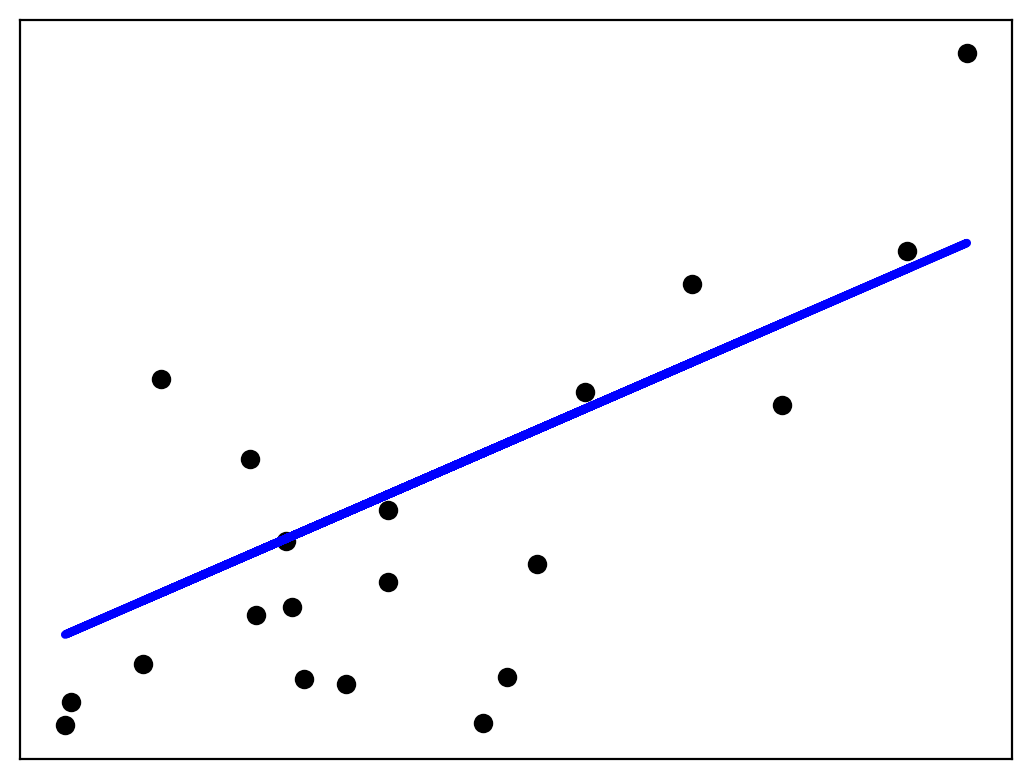

In [172]:
# https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

# Code source: Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

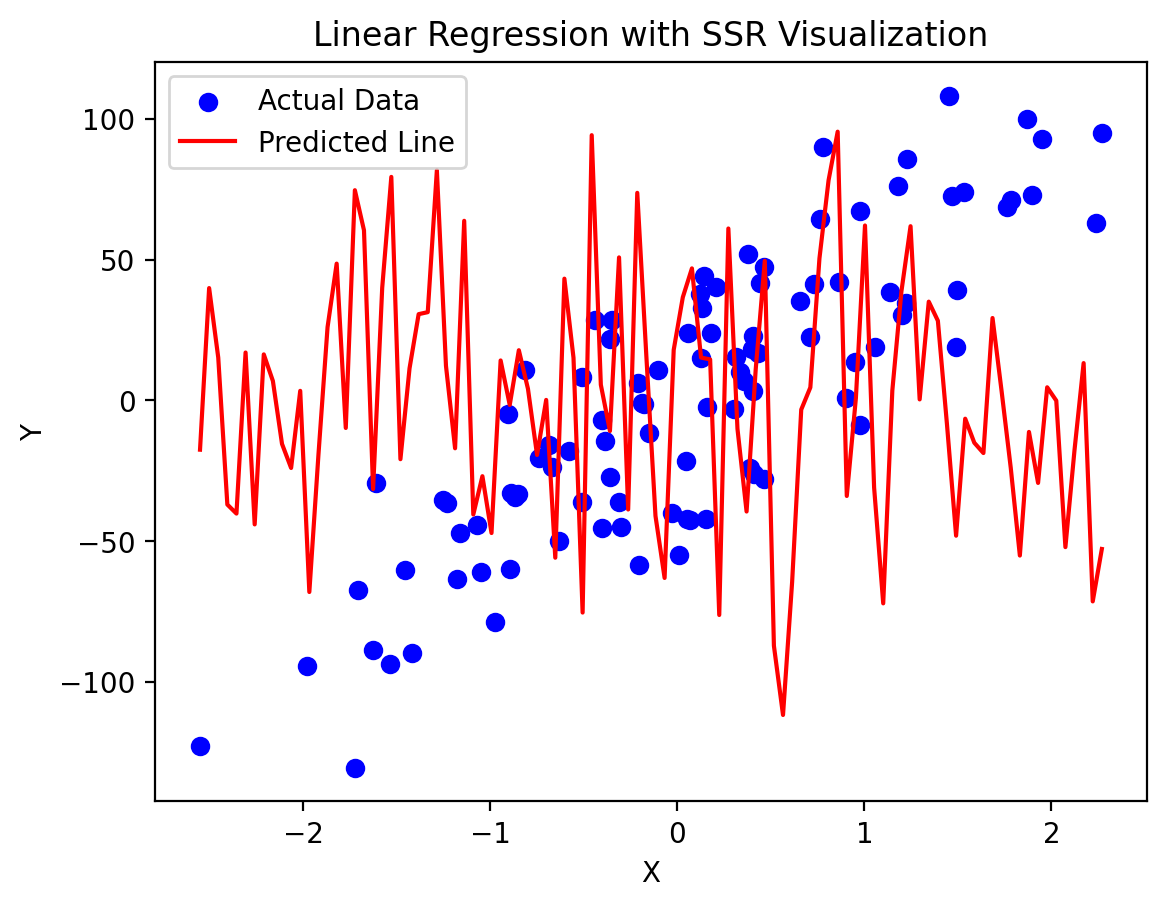